## Computer Vision
# Lab 2 - Harris Corner Detection Algorithm
# Submitted By: 
## Name: Sana Naz
## Class: BSCS-6B
## Reg. No.: 197631

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import filters
from skimage.feature import corner_peaks
from scipy import ndimage as ndi

## Display Image

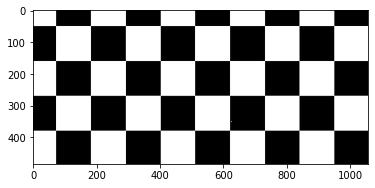

In [2]:
img1 = cv2.imread('/content/Lab-02_Image.PNG',0)
plt.imshow(img1, cmap = 'gray')

In [0]:
def display(img, filter_img, filter_text = ""):
  fig = plt.figure(figsize=(10,6))
  fig.add_subplot(1,2,1,xticks=[],yticks=[])
  plt.title('Original')
  plt.imshow(img, cmap = 'gray')

  fig.add_subplot(1,2,2,xticks=[],yticks=[])
  plt.title(filter_text)
  plt.imshow(filter_img, cmap = 'gray')

## Gradient Kernels

In [0]:
kX = np.array([[-1, 0 ,1], [-2, 0, 2], [-1, 0 ,1]])
kY = np.array([[-1,-2,-1], [0 ,0 ,0],  [1 ,2 ,1]])

## Derivatives

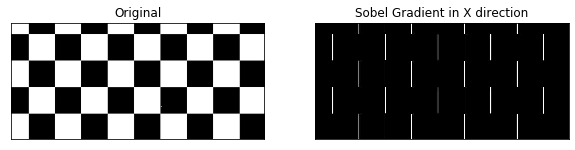

In [5]:
dX = cv2.filter2D(img1, -1, kX)
display(img1, dX, "Sobel Gradient in X direction")

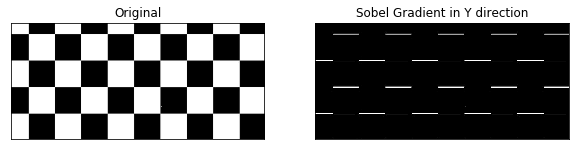

In [6]:
dY = cv2.filter2D(img1, -1, kY)
display(img1, dY, "Sobel Gradient in Y direction")

## Square of Derivatives

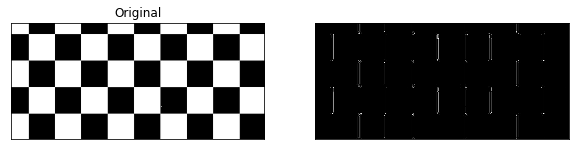

In [7]:
Ix2 = np.multiply(dX, dX)
display(img1, Ix2)

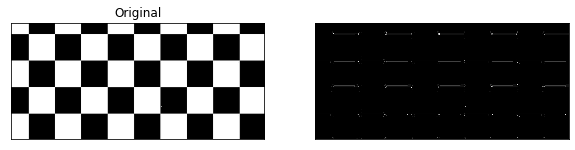

In [8]:
Iy2 = np.multiply(dY, dY)
display(img1, Iy2)

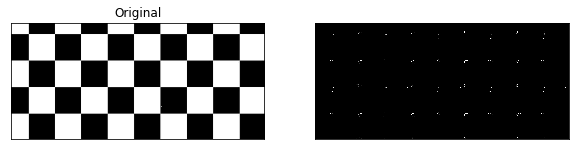

In [9]:
Ixy = np.multiply(dX, dY)
display(img1, Ixy)

## Smoothing Square of Derivatives

In [0]:
Ix2 = ndi.gaussian_filter(Ix2 , sigma=1)
Ixy = ndi.gaussian_filter(Ixy, sigma=1)
Iy2 = ndi.gaussian_filter(Iy2, sigma=1)

## Finding Harris Response

In [0]:
k = 0.05
detA = Ix2 * Iy2 - Ixy ** 2
traceA = Ix2 + Iy2
    
harris_response = detA - k * traceA ** 2

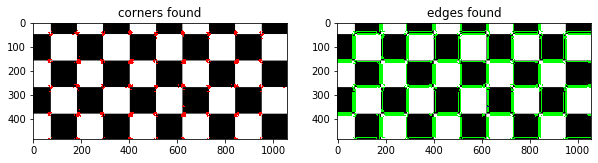

In [40]:
c_img1 = cv2.imread('/content/Lab-02_Image.PNG')
img_corners = np.copy(c_img1)
img_edges = np.copy(c_img1)
thresh = 0  

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > thresh:
            # this is a corner
            img_corners[rowindex, colindex] = [255,0,0]
        elif r < thresh:
            # this is an edge
            img_edges[rowindex, colindex] = [0,255,0]
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].set_title("corners found")
ax[0].imshow(img_copy_for_corners)
ax[1].set_title("edges found")
ax[1].imshow(img_copy_for_edges)
plt.show()

## Non-Max Suppression

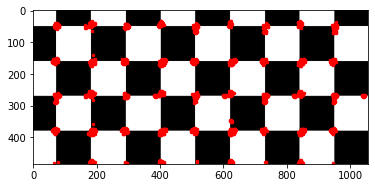

In [56]:
corners = corner_peaks(harris_response)
fig, ax = plt.subplots()
ax.imshow(c_img1, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=5)